In [25]:
import numpy as np
import pylab
import matplotlib.pyplot as plt
K = 100
Smax = 200
T = 1.0
sigma = 0.2
r = 0.1
M = 50
N = 20
h = Smax/(M+1.0)

#xj matrix
xj = np.zeros(M+2)
for j in range(0, M+2):
    xj[j] = j*h

delta_t = T/float(N)
t = np.zeros(N+1)
for j in range(0,N+1):
    t[j] = j*delta_t

In [26]:
#A matrix - we get a tridiagonal matrix
A = np.zeros((M+2,M+2))
for i in range(M+2):
    if i>0:
        A[i][i-1] = - (sigma*sigma)*(xj[i]*xj[i])/float(2*(h*h))
    A[i][i] = (sigma*sigma)*(xj[i]*xj[i])/float(h*h)+ r* xj[i]/h +r
    if i<M+1:
        A[i][i+1]=-(sigma*sigma)*(xj[i]*xj[i])/float(2*(h*h)) - r* xj[i]/h

#payoff matrix
g = np.zeros(M+2)
for i in range(0, M+2):
    g[i] = max(K-xj[i],0)

In [27]:
#calculating P matrix
P = np.zeros((M+2,N+1))
for i in range(0, M+2):
    P[i][0] = g[i]
for i in range(0, N):
    temp = np.zeros(M+2)
    temp1 = np.zeros(M+2)
    
    temp = P[:,i]-delta_t*np.matmul(A,P[:,i])
    for j in range(0, M+2):
        temp1[j] = max(temp[j], g[j])
    P[:,i+1] = temp1
    P[M+1,i+1] = 0

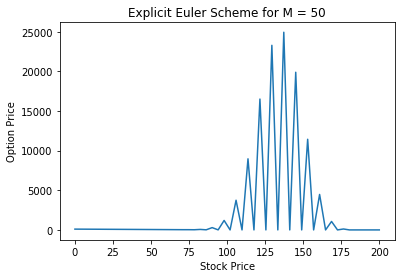

In [34]:
pylab.plot(xj, P[:,N])
plt.title('Explicit Euler Scheme for M = 50')
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.show()


In [35]:
B  = np.eye(M+2) + delta_t * A

In [36]:
def func(x,B,b,g):
    temp = np.zeros(len(x))
    y = np.matmul(B,x)
    for i in range(0,len(x)):
        temp[i] = min(x[i]-g[i], y[i]-b[i])
    return temp

In [37]:
def derivative(x,B,b,g):
    der = np.zeros((M+2,M+2))
    y = np.matmul(B,x)
    for j in range(M+2):
        for i in range(M+2):
            if y[i]-b[i]<=x[i]-g[i]:
                der[j][i] = B[j][i]
            elif i == j:
                der[j][i] = 1
            else:
                der[j][i] = 0
    return der

In [38]:
Price = np.zeros((M+2,N+1))
for i in range(0, M+2):
    Price[i][0] = g[i]

In [39]:
K1 = 1000
eps = 0.0000001
for i in range(0, N):
    b = Price[:,i]
    xx = np.zeros(M+2)
    for k in range(0,K1): 
        fx = func(xx,B,b,g)
        fxder = derivative(xx,B,b,g)
        xx = xx - np.dot(np.linalg.inv(fxder), fx)
        if max(np.abs(np.dot(np.linalg.inv(fxder), fx)))< eps: 
            break
    Price[:,i+1] = xx

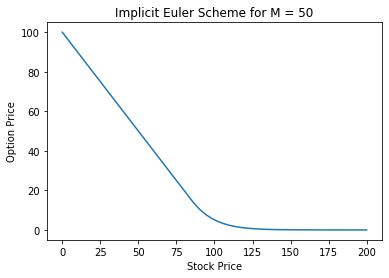

In [40]:
pylab.plot(xj, Price[:,N])
plt.title('Implicit Euler Scheme for M = 50')
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.show()
